## 4. Predicción de fugas de clientes en una compañía telefónica (7 puntos)

Una compañía telefónica está interesada en que desarrollemos un modelo que prediga los **100 clientes actuales** (dataset de explotaación) que tienen más probabilidad de abandonar la compañía. Para ello nos proporcionan una base de datos **fuga_clientes_empresa_telefonica_construccion.csv** con casos etiquetados, que usaremos para construir nuestro modelo de predicción.

Los campos de esta base de datos son:

* **Customer ID**

* **network_age**: antigüedad del cliente en días

* **Customer tenure in months:** antigüedad del cliente en meses

* **Total Spend in Months 1 and 2:** gasto total del cliente en los meses de referencia 1 y 2

* **Total SMS Spend:** gasto total en SMS

* **Total Data Spend:** gasto total en datos/internet

* **Total Data Consumption:** consumo total de datos (en KB) durante el período de estudio

* **Total Unique Calls:** número total de llamadas únicas

* **Total Onnet spend:** gasto total en llamadas a otros usuarios de la misma red de telefonía

* **Total Offnet spend:** gasto total en llamadas a otros usuarios de redes de telefonía diferentes

* **Total Call centre complaint calls:** número de llamadas de queja al call center

* **Network type subscription in Month 1:** suscripción de tipo de red en el mes 1. Esto indica la suscripción de red preferida de un cliente, lo que puede indicar su tipo de dispositivo: servicio 2G o 3G

* **Network type subscription in Month 2:** igual que el anterior pero en el mes posterior

* **Churn Status**: el valor es 1 si el cliente abandona la compañía telefónica, 0 si permanece en ella

* **Most Loved Competitor network in Month 1:** qué otro proveedor de la competencia prefiere el cliente en el mes 1. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

* **Most Loved Competitor network in Month 2:** qué otro proveedor de la competencia prefiere el cliente en el mes 2. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

La variable a predecir es **Churn Status**: el valor es 1 si el cliente **abandona** la compañía, 0 si no la abandona.

La compañía también nos proporciona otra base de datos, **fuga_clientes_empresa_telefonica_explotacion.csv**, con información sobre clientes de los que no se sabe ahora mismo si van a permanecer o no en la compañía. Por tanto en esta segunda base de datos todos los valores de la columna **Churn Status** son missing values (NaN).

La compañía nos pide que proporcionemos los IDs de los 100 clientes de la base de datos de explotación que con mayor probabilidad vayan a abandonar la compañía. Para ello proporcionaremos como entregable a la compañía un archivo csv con una sola columna, **Customer ID**, y 100 filas que contengan los IDs de los clientes seleccionados.

El fichero **ejemplo_fichero_predicciones.csv** contiene un ejemplo con el formato solicitado para este archivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
datos_construccion = pd.read_csv("./fuga_clientes_empresa_telefonica_construccion.csv")
datos_explotacion  = pd.read_csv("./fuga_clientes_empresa_telefonica_explotacion.csv")

In [3]:
datos_construccion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [4]:
datos_explotacion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [5]:
# chequeo de que las columnas son exactamente las mismas en los dos ficheros:

sum(datos_construccion.columns != datos_explotacion.columns)

0

In [6]:
# la columna a predecir es "Churn Status"
# si es 1, el cliente se va de la compañía
# si es 0, el cliente se queda

# Esta columna se sabe en el dataset de construcción (ejemplos de clientes pasados):
datos_construccion["Churn Status"].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [7]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["Churn Status"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
# analyzing the data
print(datos_construccion.shape)
datos_construccion.head(5)

(1110, 25)


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,...,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,...,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,...,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,...,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,...,0,0,1,0,1,0,0,0,0,0


In [9]:
# Loading the data
nombres_atrs = list(datos_construccion.columns)
nombres_atrs.remove('Churn Status')
nombres_atrs.remove('Customer ID') # The customer ID is not needed.

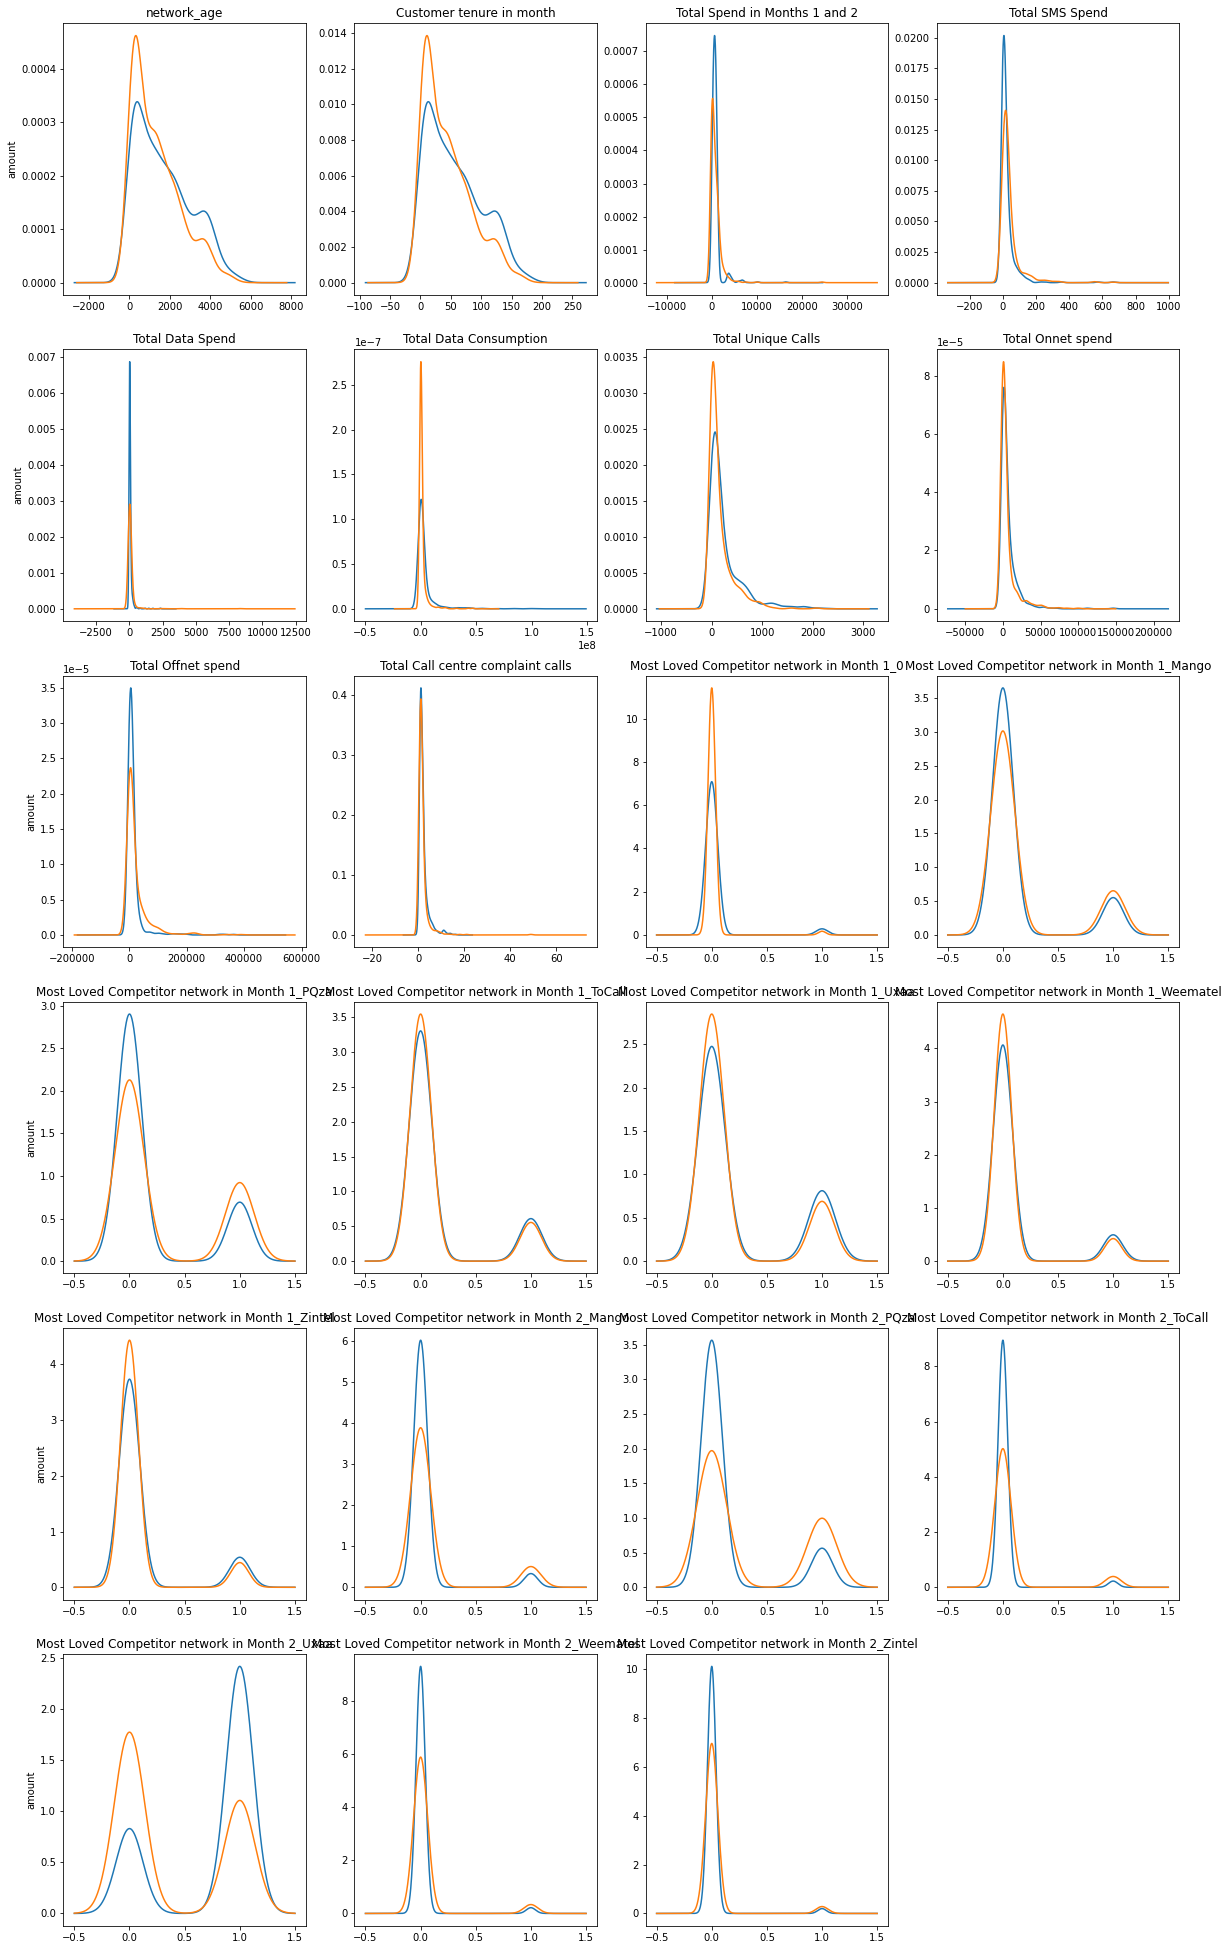

In [10]:
# Plotting the data
plt.figure(figsize=(20,35))
for i,n in enumerate(nombres_atrs):
    plt.subplot(6,4,i+1)
    aux = 'amount' if i%4==0 else ''
    datos_construccion.groupby("Churn Status")[n].plot(kind='kde', title=str(n))
    plt.ylabel(aux);

## Explanation of the histograms
* __Network age:__

We could see that come columns are not relevant for the training, the reason why is because the values of "yes" and "no", are too similar.


In [11]:
# Removing the unnecesary columns
"""
nombres_atrs.remove('Total Call centre complaint calls')
nombres_atrs.remove('Most Loved Competitor network in Month 1_ToCall')
nombres_atrs.remove('Most Loved Competitor network in Month 1_Uxaa')
nombres_atrs.remove('Most Loved Competitor network in Month 1_Weematel')
nombres_atrs.remove('Most Loved Competitor network in Month 1_Zintel')
nombres_atrs.remove('Total Onnet spend')
"""
X = datos_construccion[nombres_atrs].values
y = datos_construccion["Churn Status"].values

In [51]:
# Neural network
clf_nn = MLPClassifier(hidden_layer_sizes=(20,15,15,20), max_iter=3000, alpha=0)
scores = cross_val_score(clf_nn, X, y, cv=5)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.55 +/- 0.07


In [53]:
# Knn
clf_knn = KNeighborsClassifier(n_neighbors=70)
scores = cross_val_score(clf_knn, X, y, cv=5)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.63 +/- 0.06


In [54]:
clf_dt = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf_dt, X, y, cv=2)
clf_dt.fit(X, y)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.78 +/- 0.03


### Predictions on the new dataset

In [55]:
Xnew = datos_explotacion[nombres_atrs].values
ynew = clf_dt.predict(Xnew)

In [60]:
IDs = []
for i in range(len(datos_explotacion["Customer ID"])):
    if ynew[i] == 1:
        IDs.append(datos_explotacion["Customer ID"][i])
        

In [61]:
print(IDs[:100])

['ADF1331', 'ADF1349', 'ADF1431', 'ADF1433', 'ADF1438', 'ADF1456', 'ADF1465', 'ADF1521', 'ADF1560', 'ADF1561', 'ADF1563', 'ADF1564', 'ADF1567', 'ADF1582', 'ADF1590', 'ADF1596', 'ADF1597', 'ADF1598', 'ADF1601', 'ADF1602', 'ADF1606', 'ADF1607', 'ADF1615', 'ADF1616', 'ADF1617', 'ADF1620', 'ADF1623', 'ADF1632', 'ADF1638', 'ADF1650', 'ADF1657', 'ADF1668', 'ADF1670', 'ADF1677', 'ADF1685', 'ADF1695', 'ADF1698', 'ADF1708', 'ADF1721', 'ADF1725', 'ADF1728', 'ADF1729', 'ADF1736', 'ADF1754', 'ADF1760', 'ADF1762', 'ADF1772', 'ADF1773', 'ADF1774', 'ADF1803', 'ADF1806', 'ADF1811', 'ADF1815', 'ADF1817', 'ADF1821', 'ADF1841', 'ADF1848', 'ADF1895', 'ADF1896', 'ADF1901', 'ADF1975', 'ADF1978', 'ADF1979', 'ADF1985', 'ADF1995', 'ADF0038', 'ADF0042', 'ADF0065', 'ADF0081', 'ADF0098', 'ADF0127', 'ADF0137', 'ADF0256', 'ADF0262', 'ADF0267', 'ADF0333', 'ADF0339', 'ADF0351', 'ADF0354', 'ADF0363', 'ADF0371', 'ADF0377', 'ADF0391', 'ADF0409', 'ADF0410', 'ADF0417', 'ADF0420', 'ADF0421', 'ADF0440', 'ADF0442', 'ADF0444'